In [123]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


#read in the data

df = pd.read_csv(r"C:\Users\Giova\Desktop\covid-slqproject\part4\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [125]:
# Check columns for missing data

missing = df.isnull().any()
print(missing)

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool


In [126]:
# Check the data types of our columns

df.dtypes 

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [127]:
# Change the type of budget and gross to integer and fill their missing values with zero
df['budget'] = df['budget'].fillna(0)
df['budget']= df['budget'].astype('int64')
    
df['gross'] = df['gross'].fillna(0)
df['gross']= df['gross'].astype('int64')

#Re-inspect their datatypes

df[['gross','budget']].dtypes

gross     int64
budget    int64
dtype: object

In [128]:
#Order data by gross revenue

df.sort_values(by=['gross'], inplace = False, ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0


In [129]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [130]:
# Drop all the rows with null values

df = df.dropna(how = 'any', axis=0)

<function matplotlib.pyplot.show(*args, **kw)>

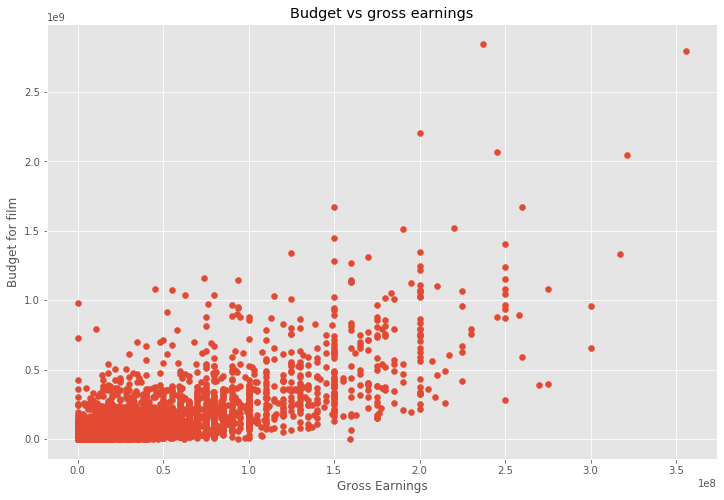

In [131]:
# Check on whether budget and company have a high correlation with gross.

# Scatter plot budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs gross earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show

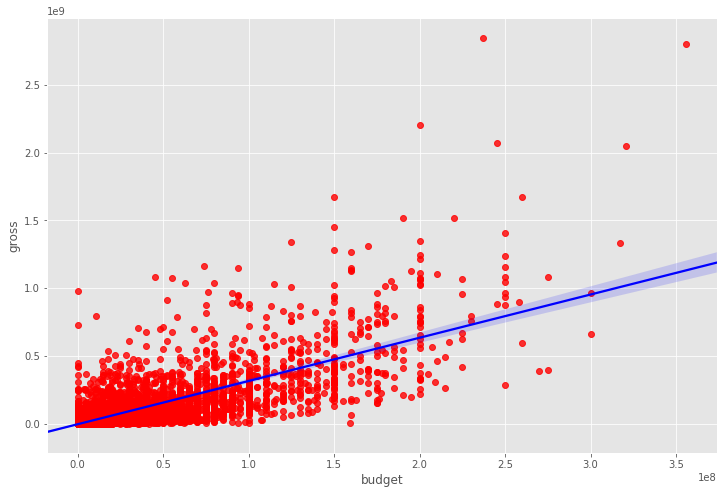

In [91]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws = {"color" :"red"}, line_kws = {"color" :"blue"})

In [132]:
# Check correlation 

df.corr() # method = pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000


In [97]:
# Budget and gross do indeed have a high correlation to each other 

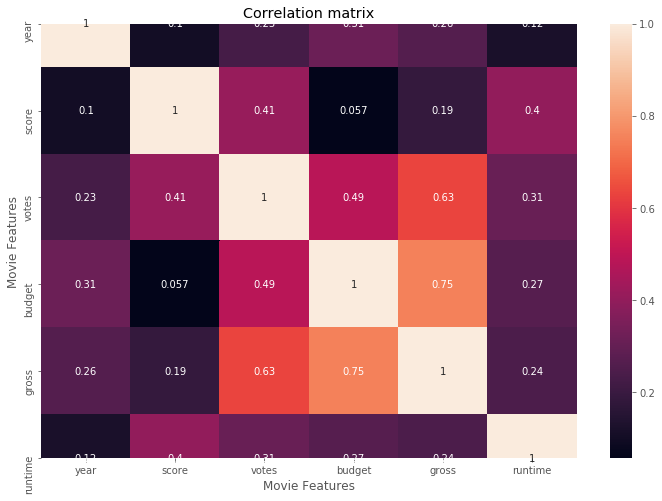

In [133]:
cor_matrix = df.corr(method= 'pearson')
sns.heatmap(cor_matrix, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [140]:
# Look at company (non-numeric values)

df_num = df 
for col_name in df_num.columns:
    if (df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
df_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5713,3,0,2020,490,6.8,3700.0,1076,1652,2747,8,80000000,461421559,360,149.0
7653,6399,6,5,2020,91,5.4,2400.0,2475,3827,2385,55,0,3661,1860,98.0
7656,6936,5,4,2020,1865,5.0,294.0,2470,3820,2326,55,0,413378,1862,120.0
7658,789,6,6,2020,1091,6.6,35.0,1739,1051,515,55,5000,0,1709,78.0


In [119]:
#See if data type was successfully changed from 'object' to 'category'
df_num['company'].dtypes

CategoricalDtype(categories=['"DIA" Productions GmbH & Co. KG',
                  '"Weathering With You" Film Partners', '.406 Production',
                  '1+2 Seisaku Iinkai', '10 West Studios', '120 Films',
                  '120dB Films', '13 Productions', '1492 Pictures',
                  '1818 Productions',
                  ...
                  'Zoetrope Studios', 'Zucker Brothers Productions',
                  'Zupnik-Curtis Enterprises', 'double A Films', 'erbp',
                  'i am OTHER', 'i5 Films', 'iDeal Partners Film Fund',
                  'micro_scope', 'thefyzz'],
                 ordered=False)

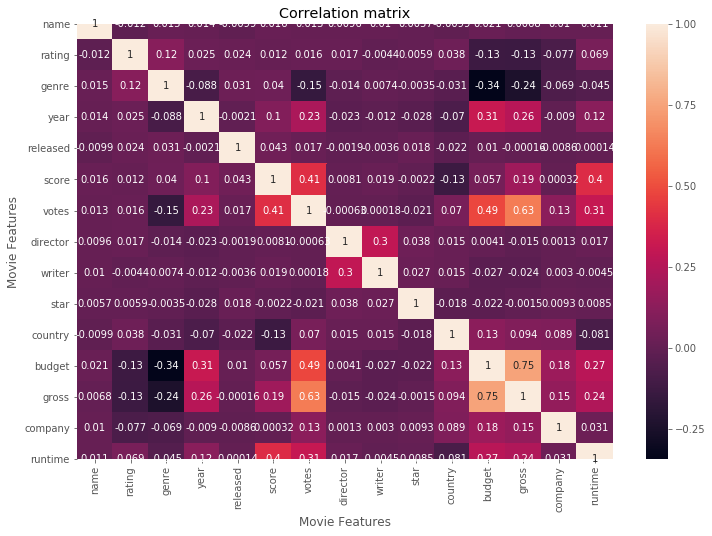

In [141]:
# Create new heatmap 

cor_matrix_num = df_num.corr(method= 'pearson')
sns.heatmap(cor_matrix_num, annot=True)
plt.title('Correlation matrix - includes categorical values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [145]:
#High correlation

cor_pairs = cor_matrix_num.unstack()
sorted_pairs = cor_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
print(high_corr)

gross     votes       0.632987
votes     gross       0.632987
budget    gross       0.750562
gross     budget      0.750562
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [134]:
# Votes and budget have the highest correlation to gross earnings 